# Fernando Jimenez Pereyra
    A01734609

In [1]:
# !pip install pandas numpy matplotlib dataprep sklearn
# !pip install tensorflow-gpu

In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

2022-09-14 17:44:18.775922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-14 17:44:18.889914: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-14 17:44:19.327068: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-14 17:44:19.327126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [4]:
# !pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [5]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [6]:
print('Tensorflow: ', tf.__version__)

Tensorflow:  2.10.0


In [7]:
df = pd.read_csv('./clean_fish.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,onehotencoder__x0_Bream,onehotencoder__x0_Parkki,onehotencoder__x0_Perch,onehotencoder__x0_Pike,onehotencoder__x0_Roach,onehotencoder__x0_Smelt,onehotencoder__x0_Whitefish,Weight,Length1,Height,Width
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,23.2,11.5200,4.0200
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0,24.0,12.4800,4.3056
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,23.9,12.3778,4.6961
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,363.0,26.3,12.7300,4.4555
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,26.5,12.4440,5.1340
...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2,11.5,2.0904,1.3936
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.4,11.7,2.4300,1.2690
156,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2,12.1,2.2770,1.2558
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.7,13.2,2.8728,2.0672


In [8]:
train, test = train_test_split(df, test_size=0.33)

In [9]:
y_train = train['Weight']
y_test = test['Weight']
x_train = train.drop(columns=['Weight'])
x_test = test.drop(columns=['Weight'])

In [10]:
test_results = {}

In [11]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [13]:
normalizer.adapt(np.array(x_train))

2022-09-14 17:44:21.198081: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-09-14 17:44:21.198109: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Saturn
2022-09-14 17:44:21.198115: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Saturn
2022-09-14 17:44:21.198250: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.141.3
2022-09-14 17:44:21.198265: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.141.3
2022-09-14 17:44:21.198268: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.141.3
2022-09-14 17:44:21.198765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical ope

In [14]:
print(normalizer.mean.numpy())

[[ 0.179  0.094  0.358  0.113  0.132  0.085  0.038 26.253  8.838  4.443]]


In [15]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [16]:
x_train[:10]

,onehotencoder__x0_Bream,onehotencoder__x0_Parkki,onehotencoder__x0_Perch,onehotencoder__x0_Pike,onehotencoder__x0_Roach,onehotencoder__x0_Smelt,onehotencoder__x0_Whitefish,Length1,Height,Width
93,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.7,5.9532,3.6300
72,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.5,2.1120,1.4080
125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40.1,12.5125,7.4165
97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,6.3750,3.8250
137,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,6.9600,4.8960
123,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.0,12.8002,6.8684
115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.6,10.5717,6.3666
17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4,14.9380,5.1975
95,0.0,0.0,1.0,0.0,0.0,0.0,0.0,21.5,6.2750,3.7250
83,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,5.9175,3.3075


In [17]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.Accuracy()])

In [18]:
%%time
history = linear_model.fit(
    x_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 2.13 s, sys: 140 ms, total: 2.27 s
Wall time: 2.06 s


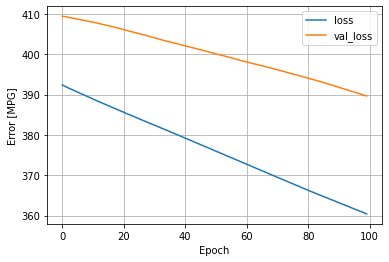

In [19]:
plot_loss(history)

In [20]:
test_results['linear_model'] = linear_model.evaluate(
    x_test, y_test, verbose=0)

In [21]:
test_results['linear_model']

[379.8812561035156, 0.0]

# Neural network

In [22]:
def compile_model(model):

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), 
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])
  return model

In [23]:
tiny_model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
tiny_dnn_model = compile_model(tiny_model)

In [24]:
%%time
history = tiny_dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.3 s, sys: 202 ms, total: 2.5 s
Wall time: 2.21 s


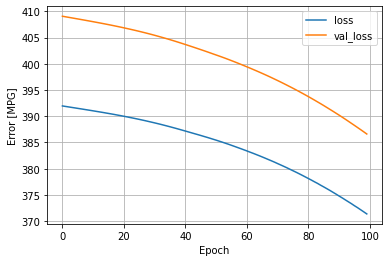

In [25]:
historys = {}
historys['tiny'] = history  
plot_loss(history)

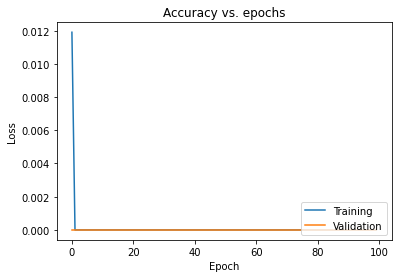

In [26]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [27]:
test_results['tiny_dnn_model'] = tiny_dnn_model.evaluate(x_test, y_test, verbose=0)

2/2 [==============================] - 0s 2ms/step


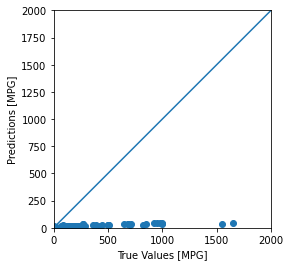

In [28]:
test_predictions = tiny_dnn_model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [29]:
r2_score(y_test, test_predictions)

-0.9668774707654637

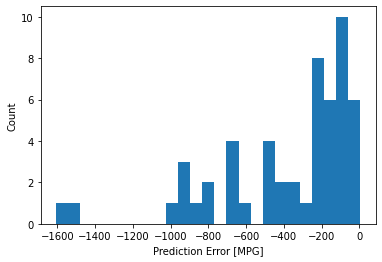

In [30]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [31]:
small_model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
small_dnn_model = compile_model(small_model)

In [32]:
%%time
history = small_dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.23 s, sys: 281 ms, total: 2.51 s
Wall time: 2.17 s


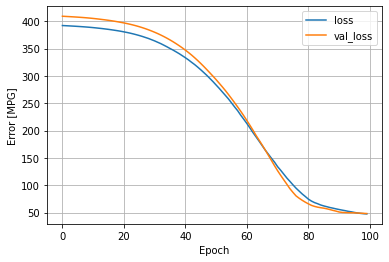

In [33]:
historys['small'] = history
plot_loss(history)

In [34]:
test_results['small_bdnn_model'] = small_dnn_model.evaluate(x_test, y_test, verbose=0)

2/2 [==============================] - 0s 2ms/step


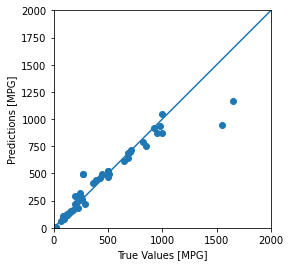

In [35]:
test_predictions = small_dnn_model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [36]:
r2_score(y_test, test_predictions)

0.8974858729569125

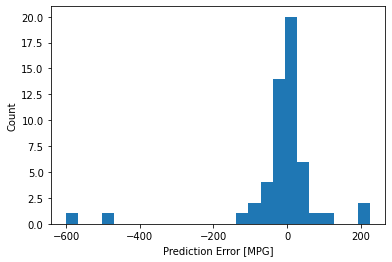

In [37]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [38]:
big_model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='relu'),
        layers.Dense(5, activation='relu'),
        layers.Dense(1)
    ])
big_dnn_model = compile_model(big_model)

In [39]:
%%time
history = big_dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)
historys['big'] = history

CPU times: user 2.17 s, sys: 323 ms, total: 2.49 s
Wall time: 2.11 s


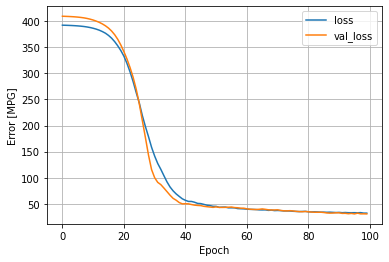

In [40]:
plot_loss(history)

In [41]:
test_results['big_bdnn_model'] = big_dnn_model.evaluate(x_test, y_test, verbose=0)

2/2 [==============================] - 0s 1ms/step


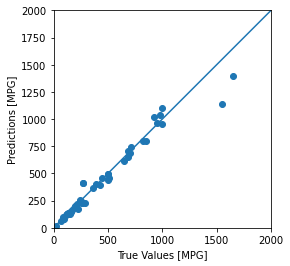

In [42]:
test_predictions = big_dnn_model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [43]:
r2_score(y_test, test_predictions)

0.9560382927142281

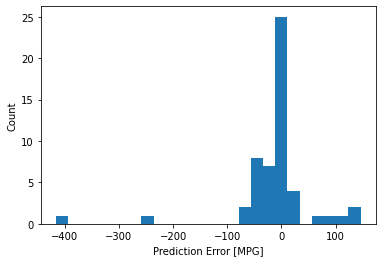

In [44]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

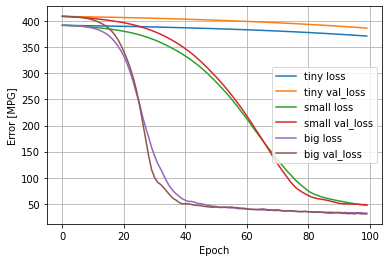

In [45]:
# plot_loss(historys)
for i in historys:
    plt.plot(historys[i].history['loss'], label= i + ' loss')
    plt.plot(historys[i].history['val_loss'], label= i + ' val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

Text(0.5, 0, 'Epochs [Log Scale]')

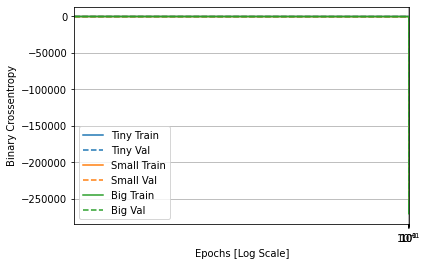

In [46]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(historys)
a = plt.xscale('log')
plt.xlabel("Epochs [Log Scale]")

In [47]:
big_model_r = keras.Sequential([
        normalizer,
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(5, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(5, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(1)
    ])
big_dnn_model_r = compile_model(big_model_r)

In [48]:
%%time
history = big_dnn_model_r.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)
historys['big_r'] = history

CPU times: user 2.35 s, sys: 261 ms, total: 2.62 s
Wall time: 2.19 s


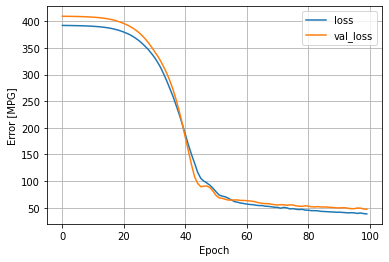

In [49]:
plot_loss(history)

In [50]:
test_results['big_bdnn_model_r'] = big_dnn_model_r.evaluate(x_test, y_test, verbose=0)

2/2 [==============================] - 0s 1ms/step


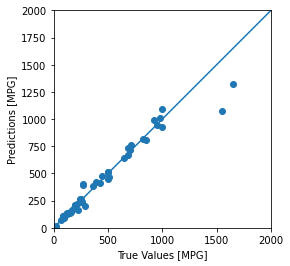

In [51]:
test_predictions = big_dnn_model_r.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [52]:
r2_score(y_test, test_predictions)

0.9447057330610255

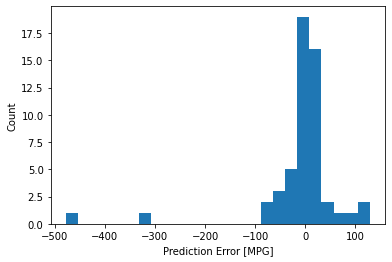

In [53]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [54]:
test_results

{'linear_model': [379.8812561035156, 0.0],
 'tiny_dnn_model': [380.54827880859375, -13113.564453125, 0.0],
 'small_bdnn_model': [53.238243103027344, -280167.875, 0.0],
 'big_bdnn_model': [37.91252899169922, -298099.21875, 0.0],
 'big_bdnn_model_r': [40.5550422668457, -295380.15625, 0.0]}

In [55]:
big_model_r = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),    
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),    
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),    
        layers.Dense(5, activation='relu'),
        layers.Dropout(0.5), 
        layers.Dense(5, activation='relu'),
        layers.Dropout(0.5), 
        layers.Dense(1)
    ])
big_dnn_model_r = compile_model(big_model_r)

In [56]:
%%time
history = big_dnn_model_r.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)
historys['big_r'] = history

CPU times: user 2.32 s, sys: 256 ms, total: 2.58 s
Wall time: 2.19 s


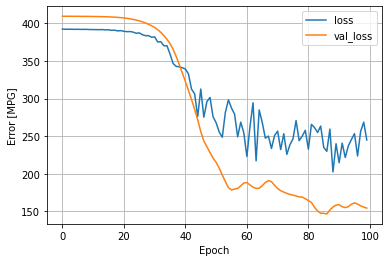

In [57]:
plot_loss(history)

In [58]:
test_results['big_bdnn_model_r'] = big_dnn_model_r.evaluate(x_test, y_test, verbose=0)

2/2 [==============================] - 0s 1ms/step


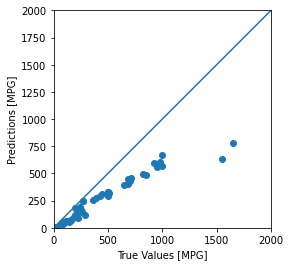

In [59]:
test_predictions = big_dnn_model_r.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [60]:
r2_score(y_test, test_predictions)

0.5735481428434285

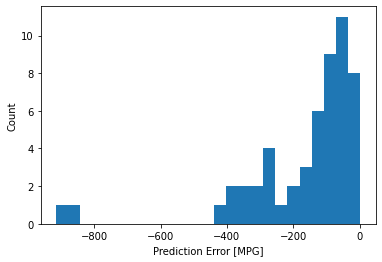

In [61]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [62]:
# tf.keras.losses.BinaryCrossentropy(
                    #   from_logits=True, name='binary_crossentropy'),
                #   'accuracy']

In [63]:
test_results

{'linear_model': [379.8812561035156, 0.0],
 'tiny_dnn_model': [380.54827880859375, -13113.564453125, 0.0],
 'small_bdnn_model': [53.238243103027344, -280167.875, 0.0],
 'big_bdnn_model': [37.91252899169922, -298099.21875, 0.0],
 'big_bdnn_model_r': [164.31809997558594, -179343.453125, 0.0]}